<div class="logo">
  <a href="https://colab.research.google.com/github/profpaulonascimento/gcet059/blob/main/gcet059_quadrados_minimos.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

# <font color=green>INTRODUÇÃO

<font size=4>Vimos, anteriormente, que a interpoladora é uma função que aproxima valores tabelados. Contudo, esta, geralmente não é aconselhável quando se é preciso obter um valor aproximado da função em algum ponto fora do intervalo de
tabelamento (extrapolação).

<!-- %Os valores tabelados geralmente são resultados de experimentos físicos, pois estes valores poderão conter erros inerentes que, em geral, não são previsíveis. -->

<font size=4>Surge, então, a necessidade de se ajustar a esta tabela, uma função que seja uma ''boa aproximação'', considerando determinada propriedade constatada nesta, e que nos permita ``extrapolar'' com certa margem de segurança.

<font size=4>Assim, o objetivo deste processo é aproximar uma função $f$ por outra função $g$, escolhida de uma família de funções, em duas situações distintas:


<ul>
<li> <font size=4>Domínio discreto: quando a função $f$ é dada por uma tabela de valores.</li>
<li> <font size=4>Domínio contínuo: quando a função $f$ é dada por sua forma analítica.</li>
</ul>

# <font color=green>O MÉTODO DOS QUADRADOS MÍNIMOS

<font size=4>Considere os $m+1$ pontos $(x_{i}; f(x_{i}))$, com $i$ assumindo valores inteiros entre $0$ e $m$.

<font size=4>O **ajuste de curvas** consiste em:
* escolhidas $n+1$ funções contínuas $g_j(x)$, definidas no intervalo $(x_{0},x_{m})$, encontrar $n+1$ escalares $\alpha_j$ tais que a função $g(x) = \displaystyle\sum_{j = 0}^{n} \alpha_j \cdot g_j(x)$ se aproxime ao máximo de $f(x)$.

<font size=4>Este modelo matemático é linear pois os $n+1$ coeficientes $\alpha_j$, que devem ser determinados, aparecem linearmente, embora as funções $g_j(x)$ possam ser não lineares.

<font size=4>Surge, então, a primeira pergunta: Como escolher as funções contínuas $g_j$?

<font size=4>Esta escolha pode ser feita observando o gráfico dos pontos tabelados (diagrama de dispersão) ou nos baseando em fundamentos teóricos do experimento que forneceu a tabela.

<font size=4>Seja $d_{i} = f(x_{i})-g(x_{i})$ o desvio existente entre as imagens de $f$ e $g$ em $x_{i}$, $i = 0, 1, \ldots, m$.

<font size=4>O **Método dos Quadrados Mínimos** (MQM) consiste em escolher os coeficientes $\alpha_j$, $j = 0, \ldots, n$, de tal forma que a soma dos quadrados dos desvios seja mínima, isto é:
$$\displaystyle\sum_{i = 0}^{m} d_{i}^2 = \displaystyle\sum_{i = 0}^{m} [f(x_{i}) - g(x_{i})]^2 \mbox{ é mínimo}.$$

<font size=4>Assim, os coeficientes $\alpha_j$, $j = 0, 1, 2, \ldots, n$, que fazem com que $g(x)$ se aproxime ao máximo de $f(x)$, são os que minimizam a função:
$$F(\alpha_{0}, \ldots, \alpha_{n})
= \displaystyle\sum_{i = 0}^{m} [f(x_{i}) - g(x_{i})]^2
= \displaystyle\sum_{i = 0}^{m} \left[f(x_{i}) - \displaystyle\sum_{j = 0}^{n} \alpha_j g_j(x_{i})\right]^2.$$

<font size=4>Para isto, é necessário que as $n+1$ derivadas parciais de $F$ de primeira ordem se anulem, ou seja:
$$\dfrac{\partial F}{\partial \alpha_j}(\alpha_{0}, \ldots, \alpha_{n}) = 0, j = 0, \ldots, n,$$
ou seja,
$$\dfrac{\partial F}{\partial \alpha_j}(\alpha_{0}, \ldots, \alpha_j) = 2 \cdot \displaystyle\sum_{i = 0}^{m} \left[f(x_{i}) - \displaystyle\sum_{j = 0}^{n} \alpha_j g_j(x_{i})\right] \cdot \left[-g_j(x_{i})\right] = 0,\ j = 0, 1, 2, \ldots, n.$$

<font size=4>Para entender melhor o que construímos até aqui, observe o exemplo a seguir:

## Exemplo

<font size=4>Vamos apresentar um exemplo em que a escolha do ajuste se baseia na distribuição
$$\{(-2,15), (-1,7), (0, 4), (1,2), (2,3), (3,6)\}$$
e, pela análise gráfica, determinar-se-á a equação polinomial da curva \(y = g(x)\) que melhor se ajusta à distribuição será a de uma parábola.

### Solução:

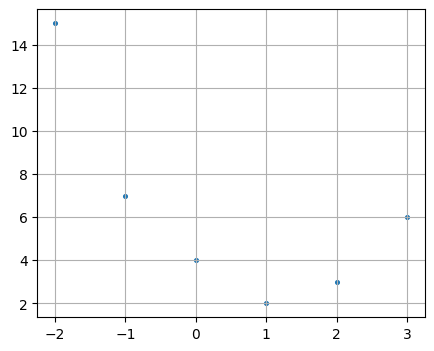

In [6]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-2,15], [-1,7], [0, 4], [1,2], [2,3], [3,6]])

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0],X[:,1],s=7)
plt.grid()
plt.show();

<font size=4>Uma parábola tem equação $g(x) = \alpha_{2} x^{2} + \alpha_{1} x + \alpha_{0}$.

<font size=4>Para cada ponto $(x_{i},y_{i})$ do conjunto, temos os desvios quadráticos dados por:
$$F = \displaystyle\sum_{i = 0}^{5} \left[y_{i} - (\alpha_{2} x_{i}^2 + \alpha_{1} x_{i} + \alpha_{0}) \right]^2 $$

<font size=4>Para encontramos os valores de $\alpha_j, j = 0, 1, 2,$ que minimizam $F$ e consequentemente, aproximam $g$ de $f$, temos que resolver o sistema:
$$\dfrac{\partial F}{\partial \alpha_j} = 0,\ j = 0, 1, 2.$$

<font size=4>Sendo assim,

* <font size=4>para $j = 0$
$$0 = \dfrac{\partial F}{\partial \alpha_{0}}
 = \displaystyle\sum_{i = 0}^{5} 2 \left[y_{i} - (\alpha_{2} x_{i}^2 + \alpha_{1} x_{i} + \alpha_{0}) \right],
$$
ou seja,
$$\displaystyle\sum_{i = 0}^{5} y_{i} = \alpha_{2} \displaystyle\sum_{i = 0}^{5} x_{i}^2 + \alpha_{1} \displaystyle\sum_{i = 0}^{5} x_{i} + \alpha_{0} \displaystyle\sum_{i = 0}^{5} x_{i}^{0}.$$

* <font size=4>para $j = 1$
$$0 = \dfrac{\partial F}{\partial \alpha_{1}}
 = \displaystyle\sum_{i = 0}^{5} 2x_{i} \left[y_{i} - (\alpha_{2} x_{i}^2 + \alpha_{1} x_{i} + \alpha_{0}) \right],
$$
ou seja,
$$\displaystyle\sum_{i = 0}^{5} y_{i}x_{i} = \alpha_{2} \displaystyle\sum_{i = 0}^{5} x_{i}^{3} + \alpha_{1} \displaystyle\sum_{i = 0}^{5} x_{i}^2 + \alpha_{0} \displaystyle\sum_{i = 0}^{5} x_{i}.$$

* <font size=4>para $j = 2$
$$0 = \dfrac{\partial F}{\partial \alpha_{2}}
 = \displaystyle\sum_{i = 0}^{5} 2x_{i}^2 \left[y_{i} - (\alpha_{2} x_{i}^2 + \alpha_{1} x_{i} + \alpha_{0}) \right],
$$
ou seja,
$$\displaystyle\sum_{i = 0}^{5} y_{i}x_{i}^2 = \alpha_{2} \displaystyle\sum_{i = 0}^{5} x_{i}^4 + \alpha_{1} \displaystyle\sum_{i = 0}^{5} x_{i}^{3} + \alpha_{0} \displaystyle\sum_{i = 0}^{5} x_{i}^2;$$

<font size=4>Temos, então, um sistema linear com três equações e três incógnitas.

<font size=4>Se fizermos $\alpha = \begin{bmatrix} \alpha_{0} & \alpha_{1} & \alpha_{2} \end{bmatrix}^t$,
$Y = \begin{bmatrix}
\displaystyle\sum_{i=0}^{5} x_{i}^{0} f(x_{i}) &
\displaystyle\sum_{i=0}^{5} x_{i}^{1} f(x_{i}) &
\displaystyle\sum_{i=0}^{5} x_{i}^{2} f(x_{i})
\end{bmatrix}^t$ e
$$G = \begin{bmatrix}
\displaystyle\sum_{i=0}^{5} x_{i}^{0} & \displaystyle\sum_{i=0}^{5} x_{i}^{1} & \displaystyle\sum_{i=0}^{5} x_{i}^{2} \\
\displaystyle\sum_{i=0}^{5} x_{i}^{1} & \displaystyle\sum_{i=0}^{5} x_{i}^{2} & \displaystyle\sum_{i=0}^{5} x_{i}^{3} \\
\displaystyle\sum_{i=0}^{5} x_{i}^{2} & \displaystyle\sum_{i=0}^{5} x_{i}^{3} & \displaystyle\sum_{i=0}^{5} x_{i}^{4}
\end{bmatrix},$$
o sistema linear pode ser escrito na forma matricial
$$G\alpha = Y \implies \alpha = G^{-1} Y.$$

<font size=4>A tabela, montada a seguir, nos ajuda a encontrar a matriz $\alpha$.

<center>

| $x_{i}$ | $y_{i}$ | $x_{i}^4$ | $x_{i}^{3}$ | $x_{i}^2$ | $x_{i}^{0}$ | $x_{i}^2y_{i}$ | $x_{i}y_{i}$ |
| ---: | ---: | --- | --- | --- | --- | --- | --- |
| $-2$ | $15$ |   |   |   |   |   |   |
| $-1$ | $ 7$ |   |   |   |   |   |   |
| $ 0$ | $ 4$ |   |   |   |   |   |   |
| $ 1$ | $ 2$ |   |   |   |   |   |   |
| $ 2$ | $ 3$ |   |   |   |   |   |   |
| $ 3$ | $ 6$ |   |   |   |   |   |   |

</center>

In [14]:
# Construindo a tabela
import pandas as pd

tabela = pd.DataFrame()
tabela['x_i'] = X[:, 0]
tabela['fx_i'] = X[:, 1]
tabela['x_i^4'] = X[:, 0]**4
tabela['x_i^3'] = X[:, 0]**3
tabela['x_i^2'] = X[:, 0]**2
tabela['x_i^0'] = X[:, 0]**0
tabela['x_i^2fx_i'] = X[:, 0]**2*X[:,1]
tabela['x_ifx_i'] = X[:, 0]*X[:,1]

nova_linha = {
'x_i': '',
'fx_i': '',
'x_i^4': (X[:, 0]**4).sum(),
'x_i^3': (X[:, 0]**3).sum(),
'x_i^2': (X[:, 0]**2).sum(),
'x_i^0': (X[:, 0]**0).sum(),
'x_i^2fx_i': (X[:, 0]**2*X[:,1]).sum(),
'x_ifx_i': (X[:, 0]*X[:,1]).sum()
}

tabela = tabela.append(nova_linha, ignore_index=True)
tabela

<ipython-input-14-a65b48247a89>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabela = tabela.append(nova_linha, ignore_index=True)


,x_i,fx_i,x_i^4,x_i^3,x_i^2,x_i^0,x_i^2fx_i,x_ifx_i
0,-2,15,16,-8,4,1,60,-30
1,-1,7,1,-1,1,1,7,-7
2,0,4,0,0,0,1,0,0
3,1,2,1,1,1,1,2,2
4,2,3,16,8,4,1,12,6
5,3,6,81,27,9,1,54,18
6,,,115,27,19,6,135,-11


Façamos $Y = \begin{bmatrix} 37 & -11 & 135 \end{bmatrix}^t$, $\alpha = \begin{bmatrix} \alpha_{0} & \alpha_{1} & \alpha_{2}\end{bmatrix}^t$ e 
$$G = \left[\begin{array}{rrr}
6 & 3 & 19 \\
3 & 19 & 27 \\
19 & 27 & 115
\end{array}\right]$$

Então, a solução do sistema $G\ \alpha = Y$ é:
$$\alpha = G^{-1}Y = \begin{bmatrix} 1.26785714 & -2.95357143 & 3.62857143\end{bmatrix}^t.$$

In [16]:
# Solução do sistema

Y = np.array([[37],[-11],[135]])
G = np.array([
    [(X[:,0]**0).sum(), (X[:,0]**1).sum(), (X[:,0]**2).sum()],
    [(X[:,0]**1).sum(), (X[:,0]**2).sum(), (X[:,0]**3).sum()],
    [(X[:,0]**2).sum(), (X[:,0]**3).sum(), (X[:,0]**4).sum()]
    ])

alpha = np.linalg.inv(G)@Y
alpha

array([[ 3.62857143],
       [-2.95357143],
       [ 1.26785714]])

Com os valores dos dos coeficientes $\alpha$, obtemos a solução dos quadrados mínimos:
$$p_2(x) = \alpha_2 x^2 + \alpha_1 x + \alpha_0.$$

Observe o gráfico do polinômio e os pontos da distribuição

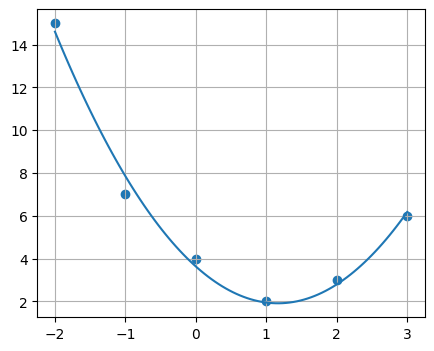

In [18]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-2,15], [-1,7], [0, 4], [1,2], [2,3], [3,6]])
x = np.linspace(-2,3,100)
p2 = lambda x: alpha[2]*x**2+alpha[1]*x+alpha[0]

plt.figure(figsize = (5, 4))
plt.scatter(X[:,0],X[:,1])
plt.plot(x,p2(x))
plt.grid()
plt.show()

# <font color=green>AJUSTE LINEAR

<font size=4>Dada uma distribuição com $m+1$ pontos $(x_{i}, f(x_{i}))$, $i = 0, 1, 2, \ldots, m$ e as $n+1$ funções $g_j(x)$, $j = 0, 1, 2, \ldots, n$, escolhidas de alguma forma, o que queremos encontrar é a reta que melhor se ajusta a estes pontos, no sentido dos quadrados mínimos.

<font size=4>Como o ajuste será feito por uma reta, tomaremos $g_{0}(x) = x^{0} = 1$ e $g_{1}(x) = x$, isto é $f(x) \approx g(x) = \alpha_{0} + \alpha_{1} x$.

<font size=4>O resíduo para cada par $(\alpha_{0}, \alpha_{1})$ e para cada $x$ será
$$r(\alpha_{0}, \alpha_{1}; f(x)) = f(x) - \alpha_{0} - \alpha_{1} x.$$

<font size=4>Assim, pelo método dos quadrados mínimos, devemos encontrar os valores de $\alpha_{0}$ e de $\alpha_{1}$ que minimizam a função:
$$F(\alpha_{0}, \alpha_{1}) = \displaystyle\sum_{i=0}^{m} [f(x_{i}) - \alpha_{0} - \alpha_{1} x_{i}]^{2}.$$

<font size=4>Do Cálculo Diferencial, sabemos que a condição necessária para encontrar pontos críticos de funções diferenciáveis é que suas derivadas parciais se anulem, isto é,
$$\begin{array}{rcl}
\left\{\begin{array}{rcl}
\dfrac{\partial}{\partial \alpha_{0}} F(\alpha_{0}, \alpha_{1}) &=& 0 \\
\dfrac{\partial}{\partial \alpha_{1}} F(\alpha_{0}, \alpha_{1}) &=& 0
\end{array}\right.
&\implies&
\left\{\begin{array}{rcl}
-2 \displaystyle\sum_{i=0}^{m} [f(x_{i}) - \alpha_{0} - \alpha_{1} x_{i}] &=& 0 \\
-2 \displaystyle\sum_{i=0}^{m} [f(x_{i}) - \alpha_{0} - \alpha_{1} x_{i}] x_{i} &=& 0
\end{array}\right. \\[1.3cm]
&\implies&
\left\{\begin{array}{rcl}
\displaystyle\sum_{i=0}^{m} f(x_{i}) - \displaystyle\sum_{i=0}^{m} \alpha_{0} - \displaystyle\sum_{i=0}^{m} \alpha_{1} x_{i} &=& 0 \\
\displaystyle\sum_{i=0}^{m} f(x_{i}) x_{i} - \displaystyle\sum_{i=0}^{m} \alpha_{0} x_{i} - \displaystyle\sum_{i=0}^{m} \alpha_{1} x_{i}^{2} &=& 0
\end{array}\right. \\[1.3cm]
&\implies&
\left\{\begin{array}{rcl}
(m+1) \alpha_{0} + \alpha_{1} \displaystyle\sum_{i=0}^{m} x_{i} &=& \displaystyle\sum_{i=0}^{m} f(x_{i}) \\
\alpha_{0} \displaystyle\sum_{i=0}^{m} x_{i} + \alpha_{1} \displaystyle\sum_{i=0}^{m} x_{i}^{2} &=& \displaystyle\sum_{i=0}^{m} f(x_{i}) x_{i}
\end{array}\right.
\end{array}$$

<font size=4>Assim, a solução do sistema de equações lineares é:
$$\begin{array}{rclcrcl}
\alpha_{1}
&=& \dfrac{(m+1) \displaystyle\sum_{i=0}^{m} f(x_{i}) x_{i}- \displaystyle\sum_{i=0}^{m} x_{i} \displaystyle\sum_{i=0}^{m} f(x_{i})}{(m+1) \displaystyle\sum_{i=0}^{m} x_{i}^{2} - \left(\displaystyle\sum_{i=0}^{m} x_{i}\right)^{2}}
& \mbox{ e } &
\alpha_{0}
&=&
\dfrac{\displaystyle\sum_{i=0}^{m} f(x_{i}) - \left(\displaystyle\sum_{i=0}^{m} x_{i}\right) \alpha_{1}}{m+1}
\end{array}$$
e, com esses valores, o resíduo apresenta o seu menor valor.

<font size=4>O método de encontrar a reta que minimiza o quadrado da distância aos pontos de uma distribuição é conhecido como regressão linear.

<font size=4>O exemplo a seguir apresenta um modo prático de calcular esses coeficientes

## Exemplo

Ajustar, por uma reta, os dados da distribuição $(1.3,2.0)$, $(2.4, 3.5)$, $(3.3, 2.7)$, $(4.1, 3.7)$, $(5.3,7.1)$ e $(6.2,2.2)$, de modo que o resíduo seja a menor possível.

### Solução:

Vamos iniciamente criar a distribuição $X$ utilizando o numpy

In [ ]:
import numpy as np

X = np.array([
    [1.3,2.0],
    [2.4,3.5],
    [3.3,2.7],
    [5.3,7.1],
    [6.2,2.2]])

X

array([[1.3, 2. ],
       [2.4, 3.5],
       [3.3, 2.7],
       [5.3, 7.1],
       [6.2, 2.2]])

In [ ]:
Y = np.array([
    [(X[:,0]**0*X[:,1]).sum()],
    [(X[:,0]**1*X[:,1]).sum()],
])

G = np.array([
    [(X[:,0]**0).sum(), (X[:,0]**1).sum()],
    [(X[:,0]**1).sum(), (X[:,0]**2).sum()]
])

Y.shape

(2, 1)

In [ ]:
alpha = np.linalg.inv(G)@Y
alpha

array([[2.05109622],
       [0.39159562]])

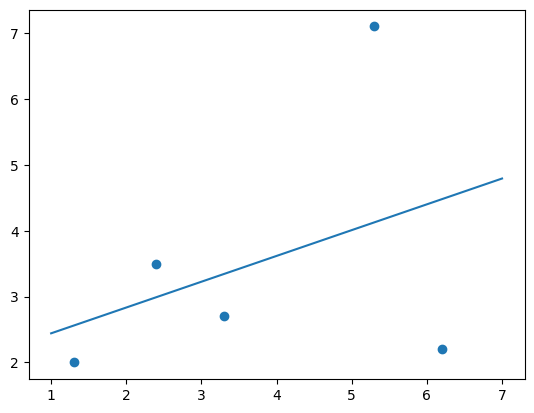

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])

x = np.linspace(1,7,100)
p1 = lambda x: alpha[1]*x+alpha[0]
plt.plot(x,p1(x))

plt.show()

# <font color=green>AJUSTE POLINOMIAL

No ajuste por um polinômio:
\begin{equation}
g(x) = \alpha_{0} + \alpha_{1} x + \alpha_{2} x^{2} + \ldots + \alpha_{n} x^{n}
\end{equation}
as equações normais são:

\begin{equation}\newcommand{\arraystretch}{2.0}
\begin{bmatrix}
m+1                        & \sum\limits_{i=0}^{m} x_{i} & \sum\limits_{i=0}^{m} x_{i}^{2} & \cdots & \sum\limits_{i=0}^{m} x_{i}^{n} \\
\sum\limits_{i=0}^{m} x_{i} & \sum\limits_{i=0}^{m} x_{i}^{2} & \sum\limits_{i=0}^{m} x_{i}^{3} & \cdots & \sum\limits_{i=0}^{m} x_{i}^{n+1} \\
\sum\limits_{i=0}^{m} x_{i}^{2} & \sum\limits_{i=0}^{m} x_{i}^{3} & \sum\limits_{i=0}^{m} x_{i}^{4} & \cdots & \sum\limits_{i=0}^{m} x_{i}^{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i=0}^{m} x_{i}^{n} & \sum\limits_{i=0}^{m} x_{i}^{n+1} & \sum\limits_{i=0}^{m} x_{i}^{n+2} & \cdots & \sum\limits_{i=0}^{m} x_{i}^{2n}
\end{bmatrix}
\begin{bmatrix}
\alpha_{0} \\[0.5cm]
\alpha_{1} \\[0.5cm]
\alpha_{2} \\[0.5cm]
\vdots \\[0.5cm]
\alpha_{n}
\end{bmatrix}
=
\begin{bmatrix}
\sum\limits_{i=0}^{m} f(x_{i}) \\
\sum\limits_{i=0}^{m} x_{i} f(x_{i}) \\
\sum\limits_{i=0}^{m} x_{i}^{2} f(x_{i}) \\
\vdots \\
\sum\limits_{i=0}^{m} x_{i}^{n} f(x_{i})
\end{bmatrix}
\end{equation}

## Exemplo

Ajuste os pontos
$(-2,-20.5)$,
$(-1.5,-12.8)$,
$(0.1,-2.7)$,
$(1.2,3.7)$,
$(2.6,8.1)$ e
$(3.4,12.2)$
a um polinômio de grau três e determine a soma dos quadrados dos resíduos. Esboce, no mesmo sistema, o gráfico do polinômio e os pontos.

### Solução:

O polinômio é escrito como
$$p_3(x) = \alpha_{3}x^{3} + \alpha_{2} x^{2} + \alpha_{1} x^{1}  \alpha_{0} x^{0}$$

Executaremos os codigos a seguir para determinar o que se pede

In [20]:
import numpy as np
import sympy as sp

x = sp.symbols('x')

X = np.array([
    [-2.0,-20.5],
    [-1.5,-12.8],
    [0.10,-2.70],
    [1.20,3.700],
    [2.60,8.100],
    [3.40,12.20]
    ])

X

array([[ -2. , -20.5],
       [ -1.5, -12.8],
       [  0.1,  -2.7],
       [  1.2,   3.7],
       [  2.6,   8.1],
       [  3.4,  12.2]])

In [21]:
Y = np.array([
    [(X[:,0]**0*X[:,1]).sum()],
    [(X[:,0]**1*X[:,1]).sum()],
    [(X[:,0]**2*X[:,1]).sum()],
    [(X[:,0]**3*X[:,1]).sum()],
])

G = np.array([
    [(X[:,0]**0).sum(), (X[:,0]**1).sum(), (X[:,0]**2).sum(), (X[:,0]**3).sum()],
    [(X[:,0]**1).sum(), (X[:,0]**2).sum(), (X[:,0]**3).sum(), (X[:,0]**4).sum()],
    [(X[:,0]**2).sum(), (X[:,0]**3).sum(), (X[:,0]**4).sum(), (X[:,0]**5).sum()],
    [(X[:,0]**3).sum(), (X[:,0]**4).sum(), (X[:,0]**5).sum(), (X[:,0]**6).sum()],
])

In [22]:
alpha = np.linalg.inv(G)@Y
alpha

array([[-2.20765981],
       [ 5.43525756],
       [-1.19853176],
       [ 0.24934955]])

In [23]:
def pn(n):
    return sum(alpha[n]*x**n for n in range(n+1))

In [24]:
pn(3)[0]

0.249349548947733*x**3 - 1.19853176339207*x**2 + 5.43525755996951*x - 2.20765980656988

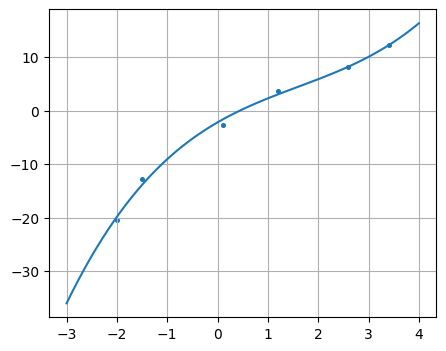

In [27]:
import matplotlib.pyplot as plt


x = np.linspace(-3,4,100)
p3 = lambda x: 0.249349548947733*x**3-1.19853176339207*x**2+5.43525755996951*x-2.20765980656988

plt.figure(figsize=(5,4))
plt.grid()
plt.scatter(X[:,0],X[:,1],s=7)
plt.plot(x,p3(x))

plt.show()

# <font color=green>AJUSTE PARA O CASO CONTÍNUO

Neste caso, teremos que aproximar a função $f: [a,b] \to \mathbb{R}$ por outra $g: [a,b] \to \mathbb{R}$ que minimize o desvio
$$\displaystyle\int_{a}^{b} (f(x) - g(x))^{2}\ dx.$$

## Exemplo

Determine a função afim que se aproxima da função $f(x) = 2x^{3}-x+3$, no intervalo $[0,1]$.

### Solução:

<font size=4>Queremos minimizar a função:
$$\begin{array}{rcl}
F(a,b)
& = & \displaystyle\int_{0}^{1} [2x^{3}-x+3 - (ax+b)]^{2} \\
& = & \displaystyle\int_{0}^{1} [2x^{3}-(1+a)x+(3-b)]^{2} \\
& = & \displaystyle\int_{0}^{1} [2x^{3}-(1+a)x+(3-b)]^{2} \\
& = & \displaystyle\int_{0}^{1} 8x^6-4(1+a)x^4+4(3-b)x^{3}+(1+a)^{2}x^{2}-2(1+a)(3-b)x+(3-b)^{2} \\
& = & \dfrac{8}{7}x^7-\dfrac{4(1+a)}{5}x^5+(3-b)x^4+\dfrac{(1+a)^{2}}{3}x^{3}-(1+a)(3-b)x^{2}+(3-b)^2x\Big|_{0}^{1} \\
& = & \dfrac{8}{7}-\dfrac{4(1+a)}{5}+(3-b)+\dfrac{(1+a)^2}{3}-(1+a)(3-b)+(3-b)^2
\end{array}$$

<font size=4>Analogamente ao caso discreto, devemos anular as derivadas com respeito aos coeficientes da função de ajuste $g$.

<font size=4>Assim,
$$0
 = \dfrac{\partial F}{\partial a}
 = \dfrac{-4}{5}+\dfrac{2}{3} (1+a)-(3-b)
\Rightarrow 47 = 10a+15b.$$

<font size=4>$$0 = \dfrac{\partial F}{\partial b}
 = -1+(1+a)-2(3-b)
\Rightarrow 6 = a+2b$$
Portanto, $a = \dfrac{4}{5}$ e $b = \dfrac{13}{5}$.

<font size=4>A seguir o esboço do gráfico das funções $f$ e $g$.

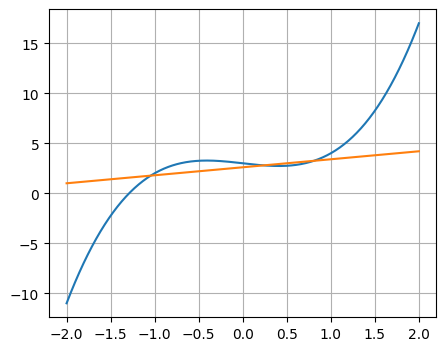

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,500)


f = lambda x: 2*x**3-x+3
g = lambda x: 4/5*x+13/5

plt.figure(figsize = (5,4))
plt.grid()
plt.plot(x,f(x))
plt.plot(x,g(x))

plt.show()

<font size=4>A aproximação pelo MQM fica cada vez mais trabalhoso à medida que aumentamos o número de coeficientes a determinar na função de ajuste. Esta função pode ser usada em problemas para obter aproximações em valores fora do intervalo considerado.

# <font color=green>EXERCÍCIOS

#### Questão 01

<font size=4>Use o método dos quadrados mínimos, de maneira conveniente, para obter uma aproximação da função $f$ dada por $f(0) = 1$; $f(1) = 2$; $f(2) = 5 $ e $f(3) = 7$:

<font size=4>(a) por uma função afim;

<font size=4>(b) por uma função quadrática.

#### Questão 02

<font size=4>Um objeto foi lançado verticalmente do alto de um prédio. Sua altura $h $ (em metros) foi registrada a cada segundo, após o lançamento, e os dados obtidos encontram-se dados pela função $h(1) = 192$; $h(2) = 180$; $h(3) = 150$; $h(4) = 115$ e $h(5) = 72$.

<font size=4>Utilize o método dos mínimos quadrados para estimar a altura do prédio h, a velocidade inicial
de lançamento $v_{0} $ e o valor da aceleração da gravidade $g$.

#### Questão 03

<font size=4>Determine os coeficientes $a$; $b $ e $c $ de maneira a tornar mínimo o valor da integral

<font size=4>(a) $\displaystyle\int_{-\pi}^{\pi} \left[\cos(x) - (a+bx+cx^{2})\right]^2\ dx$;

<font size=4>(b) $\displaystyle\int_{0}^{1} \left[(a + bx + c \cos(2\pi x) - \sin(2\pi x)\right]^2\ dx$.

#### Questão 04

<font size=4>Seja $f(x) = e - |x| $ definida no intervalo $[-e, e]$. Determine o polinômio quadrático que melhor aproxima $f $ no intervalo dado.

#### Questão 05

<font size=4>Os preços, em reais, de um fundo imobiliário, registrados durante $6 $ meses consecutivos $(t_{i} = i, i = 1, \ldots, 6)$; são
$$P = \{11.30,\ 11.8,\ 11.2,\ 11.3,\ 10,5,\ 11.1\}.$$ Desejamos estimar o comportamento dos preços segundo uma função afim $p(t) = \alpha + \beta t$; atribuindo maior peso $\lambda $ às observações mais recentes. Usaremos, na ordem apresentada, os seguintes pesos para os meses de $1 $ a $6$: $\lambda = \{0,5,\ 0,6,\ 0,7,\ 0,8,\ 0,9,\ 1.0\}$. Determine: (a) a reta de ajuste de mínimos quadrados $P(t)$; segundo o produto interno $<x,y> = \displaystyle\sum_{1}^{6} \lambda_{i} x_{i}y_{i}$; e a volatilidade da amostra, isto é, o valor $\sigma $ dado por $\sigma^2 = \displaystyle\sum_{1}^{6} \lambda_{i} (P_{i} - p(t_{i}))^2$; onde $P_{i} $ são as componentes do vetor $P $ dos preços do ativo financeiro.

#### Questão 06

<font size=4>São dadas as funções $u = (-1/2,\ -1/2,\ 0,\ 3/2,\ 1/2)$; $v = (0,\ 1,\ -1,\ 1,\ 0)$; $w = (1,\ 2,\ 0,\ 1,\ 0) $ e $p = (1,\ 1,\ 1,\ 1,\ 1)$; todas elas definidas nos pontos $x_{i} = i, i = 1, \ldots, 5$. Desejamos determinar $a$; $b $ e $c $ reais, tal que $||f - p|| $ seja mínimo, onde $f = au + bv + cw $ e $||f - p||^2 = \displaystyle\sum_{i = 1}^{5} (f(x_{i}) - p(x_{i}))^2$.

<font size=4>(a) Escreva um sistema linear para a resolução deste problema.

<font size=4>(b) Verifique se o critério de Sassenfeld para convergência do método de Gauss-Seidel é satisfeito
para este sistema.

<font size=4>(c) Reordene o sistema (através de uma reordenação dos vetores $u$; $v $ e $w$) de forma a garantir a convergência do método de Gauss-Seidel para este sistema.

#### Questão 07

<font size=4>Mediu-se o valor de uma função $f $ nos instantes $0, 1, 2 $ e $3$; obtendo-se respectivamente os valores $0,6$; $4,7$; $40 $ e $365$. Sabendo que $f(x) $ é da forma $f(x) = a\ 3^{bx}$; utilize o método dos mínimos quadrados para estimar os valores de $a $ e $b$.

#### Questão 08

<font size=4>Em uma fábrica dispõe-se de 3 máquinas para produção dos produtos $p_{1}, p_{2}, p_3 $ e $p_4$. A máquina $m_{1} $ produz $6 $ toneladas por hora, sendo $3 $ de $p_{1}$; $0 $ de $p_{2}$; $1 $ de $p_3 $ e $2 $ de $p_4$; a máquina $m_{2} $ produz $6 $ toneladas por hora, sendo $2 $ de $p_{1}$; $1 $ de $p_{2}$; $2 $ de $p_3 $ e $1 $ de $p_4$; enquanto que a máquina $m_3 $ produz $5 $ toneladas por hora, sendo $1 $ de $p_{1}$; $3 $ de $p_{2}$; $0 $ de $p_3 $ e $1 $ de $p_4$. A fábrica recebe um pedido de $11 $ toneladas de $p_{1}$; $7,9 $ de $p_{2}$; $6,4 $ de $p_3 $ e $9,3 $ de $p_4$. Determine quantas horas deve ser utilizada cada máquina de maneira que a soma dos quadrados das diferenças entre as quantidades pedidas e produzidas de cada produto seja mínima.

#### Questão 09

<font size=4>Aproxime, utilizando MMQ, a função $f$; dada por $f(0) = 10$; $f(1) = 15$; $f(2) = 23$; $f(3) = 33$; $f(4) = 45$; $f(5) = 58$; $f(6) = 69$; pela função $g(t) = \dfrac{100}{1 + \alpha e^{-\beta t}}$.

#### Questão 10

<font size=4>As posições de um cometa (em coordenadas polares convenientes) foram obtidas através da relação
$$\begin{array}{r|rrrrr}
\theta & 48^\circ & 67^\circ & 83^\circ & 108^\circ & 126^\circ \\ \hline
r & 2,70 & 2,00 & 1.61 & 1.20 & 1.02
\end{array}$$

<font size=4>Sabendo que a órbita do cometa é descrita pela lei de Kepler
$$r = \dfrac{\rho}{1 - e \cos(\theta)},$$
estime $\rho $ e $e $ usando o método dos quadrados mínimos .

#### Questão 11

<font size=4>Um objeto, arremessado do alto de um edifício, teve registradas as medidas $y(1) = 113$; $y(2) = 92$; $y(3) = 69$; $y(4) = 33 $ e $y(1) = 4$; com $y = y(x)$; em que $y $ representa a altura do objeto (em metros) em uma distância $x $ ao edifício, na direção horizontal.

<font size=4>(a) Use o método dos mínimos quadrados para estimar a trajetória (suponha um movimento uniformemente acelerado sob a ação de $g = 10 m/s^2$).

<font size=4>(b) Que estimativa se obtém para a altura do edifício e para a velocidade de lançamento do objeto?

#### Questão 12

<font size=4>Considere a função $f(x) = \dfrac{x + 1}{x^{2} + 1}$; definida no intervalo $[-2, 1]$. Aproxime $f $ por um polinômio quadrático $g$; utilizando o MQM.

#### Questão 13

<font size=4>Mediu-se o valor aproximado de uma função $f$; obtendo-se os seguintes valores:
$$\begin{array}{r|rrrrr}
x & -2 & -1 & 0 & 1 & 2 \\ \hline
f(x) & 1 & 2 & 8 & 4 & 1
\end{array}$$

<font size=4>Sabendo que $f(x) = \alpha\ 2^{\beta(x-\lambda)^2}$;

<font size=4>(a) Utilize o método dos mínimos quadrados para estimar os valores de $\alpha$; $\beta $ e $\lambda$. Mostre todas as etapas da linearização, da montagem do sistema, e resolva o sistema analiticamente ou com algum método numérico ensinado na disciplina (Eliminação de Gauss, Jacobi ou Gauss-Seidel).

<font size=4>(b) Calcule o erro cometido na aproximação.

#### Questão 14

<font size=4>Conhece-se os seguintes valores de uma função: $f(0,25) = 0,082$; $f(0,5) = 0,27$; $f(1) = 1$; $f(2) = 4,3 $ e $f(4) = 21$. Aproxime $f(x) $ por uma função do tipo $g(x) = ax^{b+c \log_{2}(x)} $ segundo um método dos mínimos quadrados (discreto).

#### Questão 15

<font size=4>Seja $f(x) = 1 - |x|$; definida para $-1 \le x \le 1$. Encontre $a $ e $b $ reais que minimizam a integral
$$\displaystyle\int_{-1}^{1} [f(x) - ax^{2} - b]^2\ dx.$$
Trabalhe com frações e forneça a resposta exata.

#### Questão 16

<font size=4>As coordenadas de um ponto $P(x, y) $ no plano podem ser determinadas conhecendo-se a distância dele a três
pontos de referência $P_{i} = (x_{i}, y_{i}), i = 1, 2, 3$; não colineares. Se $P $ está próximo à origem e os pontos de referência longe dela, a distância $d_{i} $ de $P $ a $P_{i} $ pode ser aproximada pela expressão
$$d_{i} = r_{i} - \dfrac{r_{i}}{x_{i}} x - \dfrac{r_{i}}{y_{i}} y,$$
onde $r_{i} = \sqrt{x_{i}^2 + y_{i}^2}$.

<font size=4>As medidas das distâncias estão sujeitas a erros. Foram medidas as distâncias $d_{1} = 49,4$; $d_{2} = 49,6 $ e $d_3 = 51.2 $ em relação aos pontos $P_{1}(50, 0)$; $P_{2}(-30, 40) $ e $P_3(-30, -40)$; respectivamente. Determine as coordenadas de $P $ resolvendo o sistema linear sobredeterminado para $(x, y) $ segundo o MMQ.